In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import os

from matplotlib import style
from matplotlib.pyplot import figure
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model, preprocessing
from sklearn.metrics import classification_report


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [39]:
data = pd.read_csv(r'C:\Users\william.prochnow\Documents\ProjetosDS\Cursos\MLKaggle\KNN\Arquivos\car_evaluation.csv', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [40]:
le = preprocessing.LabelEncoder() #Transformar os labels em inteiros
buying = le.fit_transform(list(data['buying']))
maint = le.fit_transform(list(data['maint']))
doors = le.fit_transform(list(data['doors']))
persons = le.fit_transform(list(data['persons']))
lug_boot = le.fit_transform(list(data['lug_boot']))
safety = le.fit_transform(list(data['safety']))
clss = le.fit_transform(list(data['class']))

predict = 'class'

In [41]:
print(data.buying)
print(buying)

0       vhigh
1       vhigh
2       vhigh
3       vhigh
4       vhigh
        ...  
1723      low
1724      low
1725      low
1726      low
1727      low
Name: buying, Length: 1728, dtype: object
[3 3 3 ... 1 1 1]


In [42]:
#Features
X = list(zip(buying, maint, doors, persons, lug_boot, safety))

#Labels
y = list(clss)

In [43]:
#Separando novamente o conjunto de treinamento/teste
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

In [44]:
model = KNeighborsClassifier(n_neighbors=3)

model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print(acc)

0.8323699421965318


In [45]:
acc = []
for i in range(1, 50):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    acc.append(model.score(x_test, y_test))
print(acc)

[0.838150289017341, 0.7976878612716763, 0.8323699421965318, 0.8497109826589595, 0.9132947976878613, 0.9248554913294798, 0.953757225433526, 0.9421965317919075, 0.9421965317919075, 0.9479768786127167, 0.9075144508670521, 0.8901734104046243, 0.8901734104046243, 0.8670520231213873, 0.8554913294797688, 0.8439306358381503, 0.8439306358381503, 0.8554913294797688, 0.8439306358381503, 0.8323699421965318, 0.8208092485549133, 0.8323699421965318, 0.815028901734104, 0.8092485549132948, 0.791907514450867, 0.7861271676300579, 0.791907514450867, 0.7861271676300579, 0.8092485549132948, 0.7976878612716763, 0.7861271676300579, 0.7803468208092486, 0.791907514450867, 0.7745664739884393, 0.7745664739884393, 0.7803468208092486, 0.7803468208092486, 0.7745664739884393, 0.7687861271676301, 0.7572254335260116, 0.7630057803468208, 0.7514450867052023, 0.7514450867052023, 0.7456647398843931, 0.7456647398843931, 0.7456647398843931, 0.7456647398843931, 0.7456647398843931, 0.7456647398843931]


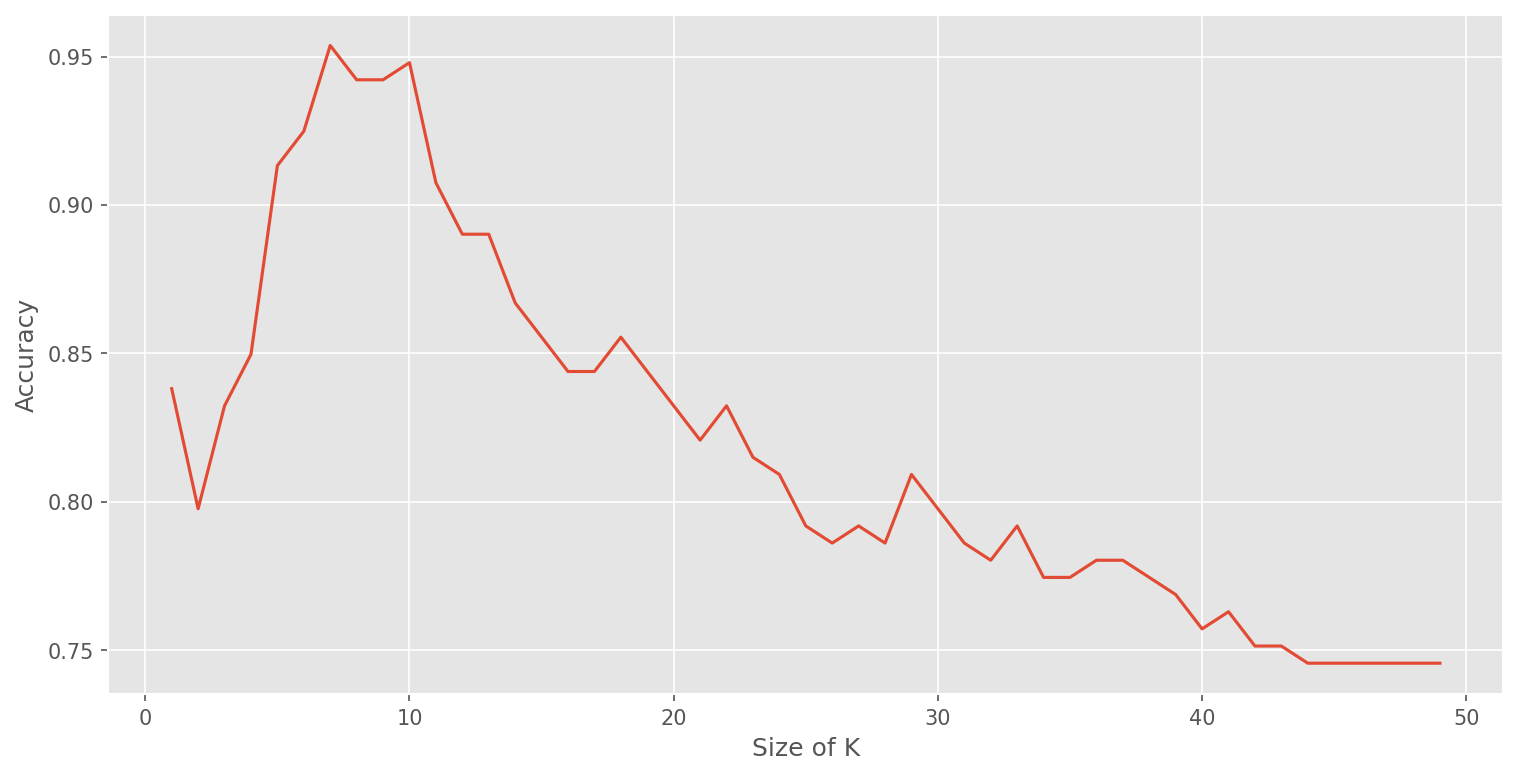

In [46]:
figure(figsize=(12, 6), dpi=150)

#modificando o estilo da grid
style.use('ggplot')

plt.plot(range(1,50), acc)
plt.xlabel('Size of K')
plt.ylabel('Accuracy')
plt.winter;

In [47]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train, y_train)
predicted = model.predict(x_test)

print(predicted)

[0 2 2 0 2 2 2 0 2 0 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 0 2 0 2 2 0 2 2 2 2 2 2 0 2 2 0 0 2 2 2 2 2
 0 1 2 2 0 0 1 0 3 2 2 2 0 2 0 2 2 2 2 0 0 3 2 0 2 2 2 2 0 0 2 2 2 2 2 2 2
 0 2 0 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 0 3 2 2 2 2 2 0 0 2 0 0 2 0 0 0 0 2
 2 2 2 1 2 2 2 2 2 2 2 0 0 2 2 3 2 2 2 2 2 0 2 2 2]


In [48]:
types = data['class'].unique()

print(classification_report(y_test, predicted, target_names=types))

              precision    recall  f1-score   support

       unacc       0.86      0.90      0.88        42
         acc       1.00      0.57      0.73         7
       vgood       0.97      0.98      0.97       119
        good       1.00      0.80      0.89         5

    accuracy                           0.94       173
   macro avg       0.96      0.81      0.87       173
weighted avg       0.94      0.94      0.94       173



In [49]:
names = ['unacc', 'acc', 'good', 'vgood']
for i in range(len(predicted)):
    print(f'Predicted: {names[predicted[i]]}, Data: {x_test[i]}, Actual: {names[y_test[i]]}')

Predicted: unacc, Data: (2, 3, 2, 2, 1, 0), Actual: unacc
Predicted: good, Data: (3, 0, 2, 2, 1, 2), Actual: good
Predicted: good, Data: (1, 1, 1, 0, 0, 1), Actual: good
Predicted: unacc, Data: (2, 1, 0, 1, 0, 2), Actual: acc
Predicted: good, Data: (3, 2, 2, 1, 1, 1), Actual: good
Predicted: good, Data: (3, 2, 1, 1, 2, 2), Actual: good
Predicted: good, Data: (1, 3, 2, 0, 0, 2), Actual: good
Predicted: unacc, Data: (0, 1, 0, 2, 2, 0), Actual: good
Predicted: good, Data: (1, 1, 3, 0, 0, 1), Actual: good
Predicted: unacc, Data: (1, 3, 2, 2, 1, 2), Actual: unacc
Predicted: good, Data: (0, 0, 3, 0, 2, 2), Actual: good
Predicted: unacc, Data: (2, 0, 2, 2, 0, 0), Actual: unacc
Predicted: good, Data: (2, 2, 2, 0, 2, 0), Actual: good
Predicted: good, Data: (0, 1, 1, 1, 2, 2), Actual: good
Predicted: good, Data: (0, 2, 0, 2, 1, 1), Actual: good
Predicted: good, Data: (0, 3, 0, 1, 0, 2), Actual: good
Predicted: acc, Data: (1, 1, 0, 1, 1, 0), Actual: acc
Predicted: good, Data: (3, 1, 1, 1, 0, 1), 